# SNLP 2021 Final Project

Name 1:  Nobel Jacob Varghese
<br/>Student id 1:  7002401
<br/>Email 1: noja00001@uni-saarland.de


Name 2:  Nitish Juttu
<br/>Student id 2:  7002402
<br/>Email 2: niju00001@uni-saarland.de

**Instructions:** Your final submission should contain _a separate Notebook_ (not including our instructions). You may also implement your code in different Python files and show the output in the Notebooks. In this case, make sure you submit your Python files as well. Do not submit the data files and any other debug output. Your submission should have a clear structure and should be easy to follow. Other instructions to follow have been given in detail with the project problem statement. Read them carefully.

Upload the zipped folder in Teams. Only one member from the group should make the submission. The deadline for the project submission is August 20th, 2021 (23:59 pm). 

# 1) Introduction

As you have learned so far, OOV words are a critical issue in language models, especially for morphologically rich languages. They lead to 0 MLE estimates, and also reduce the performance of the model as the OOV rate increases. In this project, we will try to address the problem of OOV words by one of the solutions proposed in Assignment 5: *using subword representations*. Your task is to perform the following steps:

1. Find appropriate subwords for a given corpus. 
2. Train a neural network model over these subwords.
3. Use the trained model to generate a newer, larger "corpus". 
4. Compare the OOV rates obtained on varying sizes of the generated corpora with a baseline OOV rate over word tokens.
5. Perform hyperparameter tuning at subword and neural network level to get the optimal OOV rates over the generated corpora. 

**You will repeat the above steps for two language corpora: English, and Bengali.** 

Each of the steps in the above outline have been described in detail in the rest of the Notebook. You will also find instructions on different libraries you will utilise for implementing the project. 

# 3) Overview



## **1 Data Preparation (12 points)**



In [1]:
# Import
import nltk
import string 
import os
import math


cwd = os.getcwd()
print("Current working directory: {0}".format(cwd))

Current working directory: /home/snlp-project-21/SNLP_2021_Final_Project_r1


In [2]:
#os.chdir("..")
%cd /home/snlp-project-21/SNLP_2021_Final_Project_r1

/home/snlp-project-21/SNLP_2021_Final_Project_r1


In [4]:
import nltk
nltk.download('punkt')

file_english = open("data/alice_in_wonderland.txt", "r")

english_read_data=file_english.read()

english_read_data = english_read_data.lower()

string_without_punctuations = ""

import re


string_without_punctuations=re.sub('[^A-Za-z0-9 .]+', ' ', english_read_data)
string_without_punctuations=re.sub(' +', ' ', string_without_punctuations)

from nltk.tokenize import sent_tokenize
abcd=sent_tokenize(string_without_punctuations)


total_length=len(abcd)
train_size=math.floor(0.8*total_length)
test_size=math.ceil(0.2*total_length)

train_file=abcd[0:train_size]
test_file=abcd[train_size:total_length]


with open('train_file_english.txt', 'w') as f:
    for item in train_file:
        f.write("%s\n" % item)
        
with open('test_file_english.txt', 'w') as f:
    for item in test_file:
        f.write("%s\n" % item)







[nltk_data] Downloading package punkt to /home/snlp-
[nltk_data]     project-21/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## **2 Subword Segmentation (16 points)**

### 2.1 Introduction

In this section you should break down the data into smaller units. Subwords are a very powerful tools used all around NLP which bridge the generative gap between characters and whole words.

Subwords are a means for tools to address the structure of the word. Instead of having just two views of the word as a string of characters and as an atomic word unit, we get a new one in between which is similar to syllables, but based on statistical properties of the text and with a degree of adjustability:

- Characters: `b e d c l o t h e s`
- Word unit: `bedclothes`
- Subword: `▁bed clo th es`


In [5]:
!spm_train \
  --input=train_file_english.txt \
  --model_prefix=model_prefix \
  --vocab_size=1000 \
  --character_coverage=1.0 \
  --model_type=bpe

sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: train_file_english.txt
  input_format: 
  model_prefix: model_prefix
  model_type: BPE
  vocab_size: 1000
  self_test_sample_size: 0
  character_coverage: 1
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
}
normalizer_spec {
  name: nmt_nfkc
  add_dummy_prefix: 1
  remove_extra_whitespaces: 1
  esc

In [6]:
!spm_encode \
  --model=model_prefix.model \
  --output_format=piece \
  < train_file_english.txt \
  > segmented.txt

In [7]:
!spm_decode \
  --model=model_prefix.model \
  --input_format=piece \
  < segmented.txt \
  > original.txt

In [8]:
!pwd
!ls 

/home/snlp-project-21/SNLP_2021_Final_Project_r1
data		    original.txt       test_file_english.txt
model_prefix.model  segmented.txt      train_file_english.txt
model_prefix.vocab  snlp_latest.ipynb


You can also `cd` into another directory:

In [10]:
cwd = os.getcwd()
print("Current working directory: {0}".format(cwd)) 
!mkdir project
!cp test_file_english.txt project
!cp train_file_english.txt project
%cd project

Current working directory: /home/snlp-project-21/SNLP_2021_Final_Project_r1
/home/snlp-project-21/SNLP_2021_Final_Project_r1/project


Alternatively, you can also check the Python API for sentencepiece model training and segmentation and utilise these in your code files.

### 2.3 Task

You are asked to create data for a language model based on different subword granularity, namely:

1. Characters. This can be done manually but also by running BPE with the output vocabulary size being the same as the input alphabet size. (4 points)
2. Subword Units: smaller vocabulary, closer to characters. The vocabulary size is usually in the range of 100 to 800 for English. (6 points)
3. Subword Units: larger vocabulary, closer to words. The vocabulary size is usually in the range 1500 to 3000 for English. (6 points)


In [11]:
!spm_train \
  --input=train_file_english.txt \
  --model_prefix=model_english_characters \
  --vocab_size=39\
  --character_coverage=1.0 \
  --model_type=bpe




!spm_train \
  --input=train_file_english.txt \
  --model_prefix=model_english_subwords_sm \
  --vocab_size=800 \
  --character_coverage=1.0 \
  --model_type=bpe



!spm_train \
  --input=train_file_english.txt \
  --model_prefix=model_english_subwords_lg \
  --vocab_size=3000 \
  --character_coverage=1.0 \
  --model_type=bpe

sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: train_file_english.txt
  input_format: 
  model_prefix: model_english_characters
  model_type: BPE
  vocab_size: 39
  self_test_sample_size: 0
  character_coverage: 1
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
}
normalizer_spec {
  name: nmt_nfkc
  add_dummy_prefix: 1
  remove_extra_whitespace

sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: train_file_english.txt
  input_format: 
  model_prefix: model_english_subwords_lg
  model_type: BPE
  vocab_size: 3000
  self_test_sample_size: 0
  character_coverage: 1
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
}
normalizer_spec {
  name: nmt_nfkc
  add_dummy_prefix: 1
  remove_extra_whitesp

bpe_model_trainer.cc(258) LOG(INFO) Added: freq=3 size=1720 all=4452 active=995 piece=▁pigs
bpe_model_trainer.cc(258) LOG(INFO) Added: freq=3 size=1740 all=4453 active=996 piece=▁allow
bpe_model_trainer.cc(258) LOG(INFO) Added: freq=3 size=1760 all=4444 active=987 piece=▁noise
bpe_model_trainer.cc(258) LOG(INFO) Added: freq=3 size=1780 all=4430 active=973 piece=▁deeply
bpe_model_trainer.cc(258) LOG(INFO) Added: freq=3 size=1800 all=4413 active=956 piece=▁simply
bpe_model_trainer.cc(167) LOG(INFO) Updating active symbols. max_freq=3 min_freq=1
bpe_model_trainer.cc(258) LOG(INFO) Added: freq=3 size=1820 all=4393 active=981 piece=▁further
bpe_model_trainer.cc(258) LOG(INFO) Added: freq=3 size=1840 all=4373 active=961 piece=▁sobbing
bpe_model_trainer.cc(258) LOG(INFO) Added: freq=3 size=1860 all=4354 active=942 piece=▁advantage
bpe_model_trainer.cc(258) LOG(INFO) Added: freq=3 size=1880 all=4334 active=922 piece=▁directions
bpe_model_trainer.cc(258) LOG(INFO) Added: freq=2 size=1900 all=43

In [12]:
#encoding using the train file for 1.charachter 2.subword units small 3.sub word units large

!spm_encode \
  --model=model_english_characters.model \
  --output_format=piece \
  < train_file_english.txt \
  > segmented_english_charachter_train.txt


!spm_encode \
  --model=model_english_subwords_sm.model \
  --output_format=piece \
  < train_file_english.txt \
  > segmented_english_subword_sm_train.txt


!spm_encode \
  --model=model_english_subwords_lg.model \
  --output_format=piece \
  < train_file_english.txt \
  > segmented_english_subword_lg_train.txt


In [13]:
#encoding using the test file for 1.charachter 2.subword units small 3.sub word units large

!spm_encode \
  --model=model_english_characters.model \
  --output_format=piece \
  < test_file_english.txt \
  > segmented_english_charachter_test.txt

!spm_encode \
  --model=model_english_subwords_sm.model \
  --output_format=piece \
  < test_file_english.txt \
  > segmented_english_subword_sm_test.txt

!spm_encode \
  --model=model_english_subwords_lg.model \
  --output_format=piece \
  < test_file_english.txt \
  > segmented_english_subword_lg_test.txt


## **3 LM Training (20 point)**


In [14]:
!mkdir -p models/english_char/rnnlm \
 && cd models/english_char/rnnlm \
 && /home/snlp-project-21/rnnlm/rnnlm \
 -train ../../../segmented_english_charachter_train.txt \
 -valid ../../../segmented_english_charachter_test.txt \
 -rnnlm model \
   -hidden 40 \
   -rand-seed 1 \
   -debug 2 \
   -bptt 3 \
   -class 9999

debug mode: 2
train file: ../../../segmented_english_charachter_train.txt
valid file: ../../../segmented_english_charachter_test.txt
class size: 9999
Hidden layer size: 40
BPTT: 3
Rand seed: 1
rnnlm file: model
Starting training using file ../../../segmented_english_charachter_train.txt
Vocab size: 37
Words in train file: 97450
Iter:   0	Alpha: 0.100000	   TRAIN entropy: 3.3822    Words/sec: 579.6   VALID entropy: 3.2257
Iter:   1	Alpha: 0.100000	   TRAIN entropy: 2.9057    Words/sec: 1234.1   VALID entropy: 3.0975
Iter:   2	Alpha: 0.100000	   TRAIN entropy: 2.7895    Words/sec: 1256.4   VALID entropy: 3.0419
Iter:   3	Alpha: 0.100000	   TRAIN entropy: 2.7335    Words/sec: 1288.0   VALID entropy: 3.0280
Iter:   4	Alpha: 0.100000	   TRAIN entropy: 2.7006    Words/sec: 1507.6   VALID entropy: 3.0089
Iter:   5	Alpha: 0.100000	   TRAIN entropy: 2.6767    Words/sec: 1497.5   VALID entropy: 2.9964
Iter:   6	Alpha: 0.100000	   TRAIN entropy: 2.6607    Words/sec: 1510.1   VALID entropy: 2.9798

In [15]:
!mkdir -p models/english_subwords_sm/rnnlm \
 && cd models/english_subwords_sm/rnnlm \
 && /home/snlp-project-21/rnnlm/rnnlm \
 -train ../../../segmented_english_subword_sm_train.txt \
 -valid ../../../segmented_english_subword_sm_test.txt \
 -rnnlm model \
   -hidden 40 \
   -rand-seed 1 \
   -debug 2 \
   -bptt 3 \
   -class 9999

debug mode: 2
train file: ../../../segmented_english_subword_sm_train.txt
valid file: ../../../segmented_english_subword_sm_test.txt
class size: 9999
Hidden layer size: 40
BPTT: 3
Rand seed: 1
rnnlm file: model
Starting training using file ../../../segmented_english_subword_sm_train.txt
Vocab size: 767
Words in train file: 32729
Iter:   0	Alpha: 0.100000	   TRAIN entropy: 8.6108    Words/sec: 1460.1   VALID entropy: 8.2602
Iter:   1	Alpha: 0.100000	   TRAIN entropy: 7.8161    Words/sec: 1476.3   VALID entropy: 7.8052
Iter:   2	Alpha: 0.100000	   TRAIN entropy: 7.3499    Words/sec: 1478.7   VALID entropy: 7.5143
Iter:   3	Alpha: 0.100000	   TRAIN entropy: 6.9873    Words/sec: 1453.6   VALID entropy: 7.3040
Iter:   4	Alpha: 0.100000	   TRAIN entropy: 6.6746    Words/sec: 1482.6   VALID entropy: 7.1389
Iter:   5	Alpha: 0.100000	   TRAIN entropy: 6.4004    Words/sec: 1461.6   VALID entropy: 7.0010
Iter:   6	Alpha: 0.100000	   TRAIN entropy: 6.1610    Words/sec: 1468.7   VALID entropy: 6.88

In [16]:
!mkdir -p models/english_subwords_lg/rnnlm \
 && cd models/english_subwords_lg/rnnlm \
 && /home/snlp-project-21/rnnlm/rnnlm \
 -train ../../../segmented_english_subword_lg_train.txt \
 -valid ../../../segmented_english_subword_lg_test.txt \
 -rnnlm model \
   -hidden 40 \
   -rand-seed 1 \
   -debug 2 \
   -bptt 3 \
   -class 9999

debug mode: 2
train file: ../../../segmented_english_subword_lg_train.txt
valid file: ../../../segmented_english_subword_lg_test.txt
class size: 9999
Hidden layer size: 40
BPTT: 3
Rand seed: 1
rnnlm file: model
Starting training using file ../../../segmented_english_subword_lg_train.txt
Vocab size: 2354
Words in train file: 25088
Iter:   0	Alpha: 0.100000	   TRAIN entropy: 8.8671    Words/sec: 1334.7   VALID entropy: 8.7553
Iter:   1	Alpha: 0.100000	   TRAIN entropy: 8.0354    Words/sec: 1367.1   VALID entropy: 8.3709
Iter:   2	Alpha: 0.100000	   TRAIN entropy: 7.6103    Words/sec: 1364.8   VALID entropy: 8.1808
Iter:   3	Alpha: 0.100000	   TRAIN entropy: 7.3280    Words/sec: 1362.0   VALID entropy: 8.0761
Iter:   4	Alpha: 0.100000	   TRAIN entropy: 7.1016    Words/sec: 1363.5   VALID entropy: 8.0126
Iter:   5	Alpha: 0.100000	   TRAIN entropy: 6.9043    Words/sec: 1368.4   VALID entropy: 7.9804
Iter:   6	Alpha: 0.100000	   TRAIN entropy: 6.7279    Words/sec: 1351.3   VALID entropy: 7.9

## **3 LM Training - Tuned**

In [18]:
!mkdir -p tuned_models/english_char/rnnlm \
 && cd tuned_models/english_char/rnnlm \
 && /home/snlp-project-21/rnnlm/rnnlm \
 -train ../../../segmented_english_charachter_train.txt \
 -valid ../../../segmented_english_charachter_test.txt \
 -rnnlm model \
   -hidden 70 \
   -rand-seed 1 \
   -debug 2 \
   -bptt 3 \
   -class 9999


debug mode: 2
train file: ../../../segmented_english_charachter_train.txt
valid file: ../../../segmented_english_charachter_test.txt
class size: 9999
Hidden layer size: 70
BPTT: 3
Rand seed: 1
rnnlm file: model
Starting training using file ../../../segmented_english_charachter_train.txt
Vocab size: 37
Words in train file: 97450
Iter:   0	Alpha: 0.100000	   TRAIN entropy: 3.3487    Words/sec: 390.1   VALID entropy: 3.1796
Iter:   1	Alpha: 0.100000	   TRAIN entropy: 2.7974    Words/sec: 390.3   VALID entropy: 2.9963
Iter:   2	Alpha: 0.100000	   TRAIN entropy: 2.6390    Words/sec: 392.1   VALID entropy: 2.9227
Iter:   3	Alpha: 0.100000	   TRAIN entropy: 2.5538    Words/sec: 389.3   VALID entropy: 2.8804
Iter:   4	Alpha: 0.100000	   TRAIN entropy: 2.5029    Words/sec: 390.6   VALID entropy: 2.8493
Iter:   5	Alpha: 0.100000	   TRAIN entropy: 2.4680    Words/sec: 390.9   VALID entropy: 2.8300
Iter:   6	Alpha: 0.100000	   TRAIN entropy: 2.4424    Words/sec: 392.0   VALID entropy: 2.8393
Iter:

In [19]:
!mkdir -p tuned_models/english_subwords_sm/rnnlm \
 && cd tuned_models/english_subwords_sm/rnnlm \
 && /home/snlp-project-21/rnnlm/rnnlm \
 -train ../../../segmented_english_subword_sm_train.txt \
 -valid ../../../segmented_english_subword_sm_test.txt \
 -rnnlm model \
   -hidden 50 \
   -rand-seed 1 \
   -debug 2 \
   -bptt 3 \
   -class 800

debug mode: 2
train file: ../../../segmented_english_subword_sm_train.txt
valid file: ../../../segmented_english_subword_sm_test.txt
class size: 800
Hidden layer size: 50
BPTT: 3
Rand seed: 1
rnnlm file: model
Starting training using file ../../../segmented_english_subword_sm_train.txt
Vocab size: 767
Words in train file: 32729
Iter:   0	Alpha: 0.100000	   TRAIN entropy: 8.2099    Words/sec: 17494.2   VALID entropy: 8.0276
Iter:   1	Alpha: 0.100000	   TRAIN entropy: 7.7777    Words/sec: 17867.7   VALID entropy: 7.6707
Iter:   2	Alpha: 0.100000	   TRAIN entropy: 7.3741    Words/sec: 17572.8   VALID entropy: 7.4142
Iter:   3	Alpha: 0.100000	   TRAIN entropy: 7.0674    Words/sec: 17354.9   VALID entropy: 7.2333
Iter:   4	Alpha: 0.100000	   TRAIN entropy: 6.8094    Words/sec: 17736.5   VALID entropy: 7.0989
Iter:   5	Alpha: 0.100000	   TRAIN entropy: 6.5792    Words/sec: 17666.9   VALID entropy: 6.9857
Iter:   6	Alpha: 0.100000	   TRAIN entropy: 6.3668    Words/sec: 17543.1   VALID entropy

In [20]:
!mkdir -p tuned_models/english_subwords_lg/rnnlm \
 && cd tuned_models/english_subwords_lg/rnnlm \
 && /home/snlp-project-21/rnnlm/rnnlm \
 -train ../../../segmented_english_subword_lg_train.txt \
 -valid ../../../segmented_english_subword_lg_test.txt \
 -rnnlm model \
   -hidden 50 \
   -rand-seed 1 \
   -debug 2 \
   -bptt 3 \
   -class 3000

debug mode: 2
train file: ../../../segmented_english_subword_lg_train.txt
valid file: ../../../segmented_english_subword_lg_test.txt
class size: 3000
Hidden layer size: 50
BPTT: 3
Rand seed: 1
rnnlm file: model
Starting training using file ../../../segmented_english_subword_lg_train.txt
Vocab size: 2354
Words in train file: 25088
Iter:   0	Alpha: 0.100000	   TRAIN entropy: 8.5104    Words/sec: 4783.2   VALID entropy: 8.4909
Iter:   1	Alpha: 0.100000	   TRAIN entropy: 7.9037    Words/sec: 4734.3   VALID entropy: 8.1676
Iter:   2	Alpha: 0.100000	   TRAIN entropy: 7.5036    Words/sec: 4800.0   VALID entropy: 7.9989
Iter:   3	Alpha: 0.100000	   TRAIN entropy: 7.2345    Words/sec: 4799.0   VALID entropy: 7.9122
Iter:   4	Alpha: 0.100000	   TRAIN entropy: 7.0227    Words/sec: 4699.6   VALID entropy: 7.8653
Iter:   5	Alpha: 0.100000	   TRAIN entropy: 6.8418    Words/sec: 4797.3   VALID entropy: 7.8456
Iter:   6	Alpha: 0.050000	   TRAIN entropy: 6.6193    Words/sec: 4825.6   VALID entropy: 7.8

## **4 Text Generation (16 points)**



**Note: The coresponding generated file is saved under models/{corresponding_model}/rnnlm/model **



**Note: The coresponding decoded file is saved under models/{corresponding_model}/rnnlm/model **

In [22]:
for i in range(1,8):
    !echo 'generating' $((10**$i))
    !/home/snlp-project-21/rnnlm/rnnlm \
    -rnnlm models/english_char/rnnlm/model -gen  $[10**$i]  -debug 0 \
    > models/english_char/rnnlm/$[10**$i].txt
    !spm_decode --model=model_english_characters.model --input_format=piece < models/english_char/rnnlm/$[10**$i].txt > models/english_char/rnnlm/decoded$[10**$i].txt

generating 10
generating 100
generating 1000
generating 10000
generating 100000
generating 1000000
generating 10000000


In [23]:
for i in range(1,8):
    !echo 'generating' $((10**$i))
    !/home/snlp-project-21/rnnlm/rnnlm \
    -rnnlm models/english_subwords_sm/rnnlm/model -gen  $[10**$i]  -debug 0 \
    > models/english_subwords_sm/rnnlm/$[10**$i].txt
    !spm_decode --model=model_english_subwords_sm.model --input_format=piece < models/english_subwords_sm/rnnlm/$[10**$i].txt > models/english_subwords_sm/rnnlm/decoded$[10**$i].txt

generating 10
generating 100
generating 1000
generating 10000
generating 100000
generating 1000000
generating 10000000


In [24]:
for i in range(1,8):
    !echo 'generating' $((10**$i))
    !/home/snlp-project-21/rnnlm/rnnlm \
    -rnnlm models/english_subwords_lg/rnnlm/model -gen  $[10**$i]  -debug 0 \
    > models/english_subwords_lg/rnnlm/$[10**$i].txt
    !spm_decode --model=model_english_subwords_lg.model --input_format=piece < models/english_subwords_lg/rnnlm/$[10**$i].txt > models/english_subwords_lg/rnnlm/decoded$[10**$i].txt

generating 10
generating 100
generating 1000
generating 10000
generating 100000
generating 1000000
generating 10000000


## **Text Generation - Tuned**

**Note: The coresponding text file is saved under tuned_models/{corresponding_model}/rnnlm/model **
    
**Note: The coresponding decoded file is saved under tuned_models/{corresponding_model}/rnnlm/model **    

In [26]:
for i in range(1,8):
    !echo 'generating' $((10**$i))
    !/home/snlp-project-21/rnnlm/rnnlm \
    -rnnlm tuned_models/english_char/rnnlm/model -gen  $[10**$i]  -debug 0 \
    > tuned_models/english_char/rnnlm/$[10**$i].txt
    !spm_decode --model=model_english_characters.model --input_format=piece < tuned_models/english_char/rnnlm/$[10**$i].txt > tuned_models/english_char/rnnlm/decoded$[10**$i].txt

generating 10
generating 100
generating 1000
generating 10000
generating 100000
generating 1000000
generating 10000000


In [27]:
for i in range(1,8):
    !echo 'generating' $((10**$i))
    !/home/snlp-project-21/rnnlm/rnnlm \
    -rnnlm tuned_models/english_subwords_sm/rnnlm/model -gen  $[10**$i]  -debug 0 \
    > tuned_models/english_subwords_sm/rnnlm/$[10**$i].txt
    !spm_decode --model=model_english_subwords_sm.model --input_format=piece < tuned_models/english_subwords_sm/rnnlm/$[10**$i].txt > tuned_models/english_subwords_sm/rnnlm/decoded$[10**$i].txt

generating 10
generating 100
generating 1000
generating 10000
generating 100000
generating 1000000
generating 10000000


In [28]:
for i in range(1,8):
    !echo 'generating' $((10**$i))
    !/home/snlp-project-21/rnnlm/rnnlm \
    -rnnlm tuned_models/english_subwords_lg/rnnlm/model -gen  $[10**$i]  -debug 0 \
    > tuned_models/english_subwords_lg/rnnlm/$[10**$i].txt
    !spm_decode --model=model_english_subwords_lg.model --input_format=piece < tuned_models/english_subwords_lg/rnnlm/$[10**$i].txt > tuned_models/english_subwords_lg/rnnlm/decoded$[10**$i].txt

generating 10
generating 100
generating 1000
generating 10000
generating 100000
generating 1000000
generating 10000000


## **5 OOV comparison (16 points)**



In [7]:
import os
cwd = os.getcwd()
print("Current working directory: {0}".format(cwd)) 

Current working directory: /home/snlp-project-21/SNLP_2021_Final_Project_r1


In [1]:
#5.1

with open('train_file_english.txt') as f:
    flat_list_train_english=[word for line in f for word in line.split()]
    
set_train_english=set(flat_list_train_english)



with open('test_file_english.txt') as f:
    flat_list_test_english=[word for line in f for word in line.split()]

set_test_english=set(flat_list_test_english)

ovv_baseline_model=len(set_test_english-set_train_english)/len(flat_list_test_english)

print(ovv_baseline_model)




0.07172818791946309


In [9]:
!mkdir -p decoded_text/english_char
!mkdir -p decoded_text/english_subwords_sm
!mkdir -p decoded_text/english_subwords_lg

In [12]:
!mkdir -p tuned_decoded_text/english_char
!mkdir -p tuned_decoded_text/english_subwords_sm
!mkdir -p tuned_decoded_text/english_subwords_lg

In [15]:
#for each decoded file combine with original train
for i in range(1,8):
    filenames = ['train_file_english.txt', 'models/english_char/rnnlm/decoded{}.txt'.format(pow(10, i))]
    with open('decoded_text/english_char/english_char_concatenated{}'.format(i), 'w') as outfile:
        for fname in filenames:
            with open(fname) as infile:
                for line in infile:
                    outfile.write(line)

                    
                    
for i in range(1,8):
    filenames = ['train_file_english.txt', 'models/english_subwords_sm/rnnlm/decoded{}.txt'.format(pow(10, i))]
    with open('decoded_text/english_subwords_sm/english_subwords_sm_concatenated{}'.format(i), 'w') as outfile:
        for fname in filenames:
            with open(fname) as infile:
                for line in infile:
                    outfile.write(line)
                    
                    
                    
for i in range(1,8):
    filenames = ['train_file_english.txt', 'models/english_subwords_lg/rnnlm/decoded{}.txt'.format(pow(10, i))]
    with open('decoded_text/english_subwords_lg/english_subwords_lg_concatenated{}'.format(i), 'w') as outfile:
        for fname in filenames:
            with open(fname) as infile:
                for line in infile:
                    outfile.write(line)

In [16]:
#for each decoded file combine with original train
for i in range(1,8):
    filenames = ['train_file_english.txt', 'tuned_models/english_char/rnnlm/decoded{}.txt'.format(pow(10, i))]
    with open('tuned_decoded_text/english_char/english_char_concatenated_tuned{}'.format(i), 'w') as outfile:
        for fname in filenames:
            with open(fname) as infile:
                for line in infile:
                    outfile.write(line)

                    
                    
for i in range(1,8):
    filenames = ['train_file_english.txt', 'tuned_models/english_subwords_sm/rnnlm/decoded{}.txt'.format(pow(10, i))]
    with open('tuned_decoded_text/english_subwords_sm/english_subwords_sm_concatenated_tuned{}'.format(i), 'w') as outfile:
        for fname in filenames:
            with open(fname) as infile:
                for line in infile:
                    outfile.write(line)
                    
                    
                    
for i in range(1,8):
    filenames = ['train_file_english.txt', 'tuned_models/english_subwords_lg/rnnlm/decoded{}.txt'.format(pow(10, i))]
    with open('tuned_decoded_text/english_subwords_lg/english_subwords_lg_concatenated_tuned{}'.format(i), 'w') as outfile:
        for fname in filenames:
            with open(fname) as infile:
                for line in infile:
                    outfile.write(line)

In [17]:
english_char={}

for i in range(1,8):
    with open('decoded_text/english_char/english_char_concatenated{}'.format(i)) as f:
        temp1=[word for line in f for word in line.split()]
        set_temp1=set(temp1)
    
    with open('test_file_english.txt') as f:
        temp2=[word for line in f for word in line.split()]
        set_temp2=set(temp2)
    ovv_value=len(set_temp2-set_temp1)/len(temp2)

    english_char['{}'.format(pow(10, i))]=ovv_value
    

print(english_char)


english_subwords_sm={}

for i in range(1,8):
    with open('decoded_text/english_subwords_sm/english_subwords_sm_concatenated{}'.format(i)) as f:
        temp1=[word for line in f for word in line.split()]
        set_temp1=set(temp1)
    
    with open('test_file_english.txt') as f:
        temp2=[word for line in f for word in line.split()]
        set_temp2=set(temp2)
    ovv_value=len(set_temp2-set_temp1)/len(temp2)

    english_subwords_sm['{}'.format(pow(10, i))]=ovv_value
    

print(english_subwords_sm)

english_subwords_lg={}

for i in range(1,8):
    with open('decoded_text/english_subwords_lg/english_subwords_lg_concatenated{}'.format(i)) as f:
        temp1=[word for line in f for word in line.split()]
        set_temp1=set(temp1)
    
    with open('test_file_english.txt') as f:
        temp2=[word for line in f for word in line.split()]
        set_temp2=set(temp2)
    ovv_value=len(set_temp2-set_temp1)/len(temp2)

    english_subwords_lg['{}'.format(pow(10, i))]=ovv_value
    

print(english_subwords_lg)


{'10': 0.07172818791946309, '100': 0.07172818791946309, '1000': 0.07172818791946309, '10000': 0.07088926174496644, '100000': 0.0662751677852349, '1000000': 0.05893456375838926, '10000000': 0.04865771812080537}
{'10': 0.07172818791946309, '100': 0.07172818791946309, '1000': 0.07172818791946309, '10000': 0.07026006711409397, '100000': 0.06459731543624161, '1000000': 0.054110738255033555, '10000000': 0.040687919463087245}
{'10': 0.07172818791946309, '100': 0.07172818791946309, '1000': 0.07172818791946309, '10000': 0.06942114093959731, '100000': 0.06438758389261745, '1000000': 0.05809563758389262, '10000000': 0.05054530201342282}


In [18]:
english_char_tuned={}

for i in range(1,8):
    with open('tuned_decoded_text/english_char/english_char_concatenated_tuned{}'.format(i)) as f:
        temp1=[word for line in f for word in line.split()]
        set_temp1=set(temp1)
        
    
    with open('test_file_english.txt') as f:
        temp2=[word for line in f for word in line.split()]
        set_temp2=set(temp2)
    ovv_value=len(set_temp2-set_temp1)/len(temp2)

    english_char_tuned['{}'.format(pow(10, i))]=ovv_value
    

print(english_char_tuned)


english_subwords_sm_tuned={}

for i in range(1,8):
    with open('tuned_decoded_text/english_subwords_sm/english_subwords_sm_concatenated_tuned{}'.format(i)) as f:
        temp1=[word for line in f for word in line.split()]
        set_temp1=set(temp1)
    
    with open('test_file_english.txt') as f:
        temp2=[word for line in f for word in line.split()]
        set_temp2=set(temp2)
    ovv_value=len(set_temp2-set_temp1)/len(temp2)

    english_subwords_sm_tuned['{}'.format(pow(10, i))]=ovv_value
    

print(english_subwords_sm_tuned)

english_subwords_lg_tuned={}

for i in range(1,8):
    with open('tuned_decoded_text/english_subwords_lg/english_subwords_lg_concatenated_tuned{}'.format(i)) as f:
        temp1=[word for line in f for word in line.split()]
        set_temp1=set(temp1)
    
    with open('test_file_english.txt') as f:
        temp2=[word for line in f for word in line.split()]
        set_temp2=set(temp2)
    ovv_value=len(set_temp2-set_temp1)/len(temp2)

    english_subwords_lg_tuned['{}'.format(pow(10, i))]=ovv_value
    

print(english_subwords_lg_tuned)





{'10': 0.07172818791946309, '100': 0.07172818791946309, '1000': 0.07172818791946309, '10000': 0.07109899328859061, '100000': 0.06837248322147652, '1000000': 0.05893456375838926, '10000000': 0.045931208053691275}
{'10': 0.07172818791946309, '100': 0.07172818791946309, '1000': 0.07172818791946309, '10000': 0.0700503355704698, '100000': 0.06543624161073826, '1000000': 0.053691275167785234, '10000000': 0.041526845637583895}
{'10': 0.07172818791946309, '100': 0.07172818791946309, '1000': 0.07172818791946309, '10000': 0.06963087248322147, '100000': 0.06459731543624161, '1000000': 0.05725671140939597, '10000000': 0.050335570469798654}


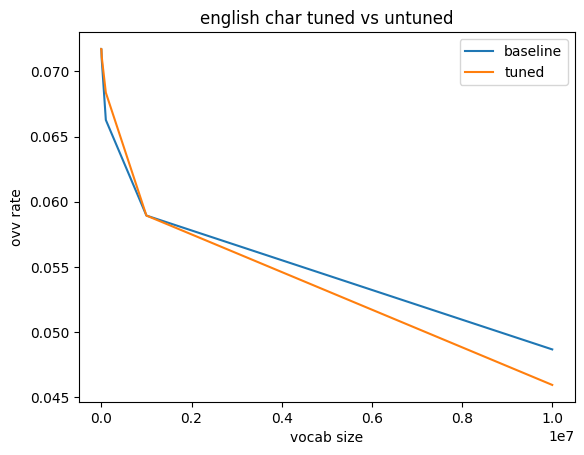

In [30]:
import matplotlib.pyplot as plt

x_axis_english_char=[10,100,1000,10000,100000,1000000,10000000]
y_axis_english_char=[]

x_axis_english_tuned=[10,100,1000,10000,100000,1000000,10000000]
y_axis_english_char_tuned=[]


for key in english_char:
    y_axis_english_char.append(english_char[key])
    
for key in english_char_tuned:
    y_axis_english_char_tuned.append(english_char_tuned[key])

plt.plot(x_axis_english_char, y_axis_english_char,label="baseline")

plt.plot(x_axis_english_tuned,y_axis_english_char_tuned,label="tuned")

plt.title('english char tuned vs untuned')


plt.xlabel("vocab size")
plt.ylabel("ovv rate")
plt.legend(loc="upper right")

plt.show()




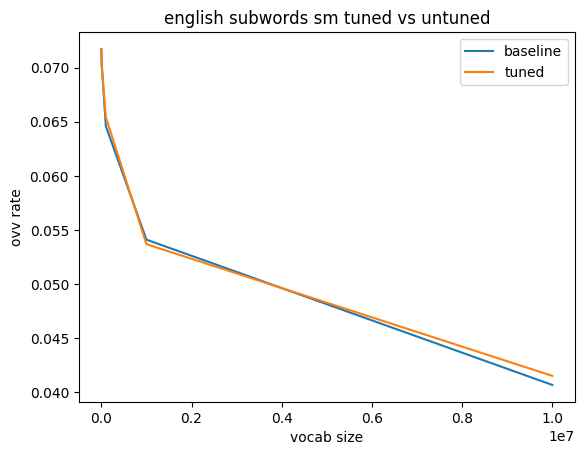

In [31]:
import matplotlib.pyplot as plt

x_axis_english_subwords_sm=[10,100,1000,10000,100000,1000000,10000000]
y_axis_english_subwords_sm=[]

x_axis_english_tuned_subwords_sm=[10,100,1000,10000,100000,1000000,10000000]
y_axis_english_tuned_subwords_sm=[]


for key in english_subwords_sm:
    y_axis_english_subwords_sm.append(english_subwords_sm[key])
    
for key in english_subwords_sm_tuned:
    y_axis_english_tuned_subwords_sm.append(english_subwords_sm_tuned[key])

plt.plot(x_axis_english_subwords_sm, y_axis_english_subwords_sm,label="baseline")

plt.plot(x_axis_english_tuned_subwords_sm,y_axis_english_tuned_subwords_sm,label="tuned")

plt.title('english subwords sm tuned vs untuned')

plt.xlabel("vocab size")
plt.ylabel("ovv rate")
plt.legend(loc="upper right")
plt.show()


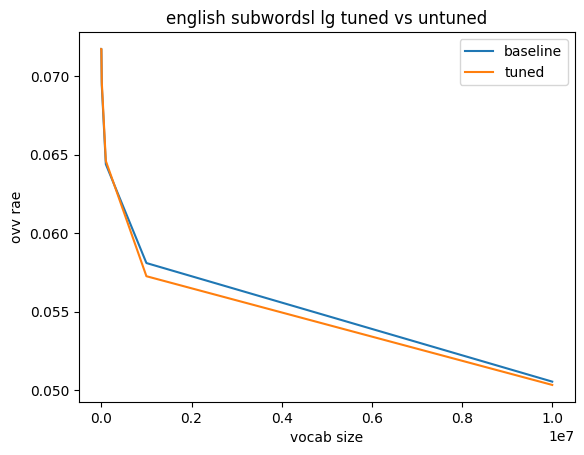

In [27]:
import matplotlib.pyplot as plt

x_axis_english_subwords_lg=[10,100,1000,10000,100000,1000000,10000000]
y_axis_english_subwords_lg=[]

x_axis_english_tuned_subwords_lg=[10,100,1000,10000,100000,1000000,10000000]
y_axis_english_tuned_subwords_lg=[]


for key in english_subwords_lg:
    y_axis_english_subwords_lg.append(english_subwords_lg[key])
    
for key in english_subwords_lg_tuned:
    y_axis_english_tuned_subwords_lg.append(english_subwords_lg_tuned[key])

plt.plot(x_axis_english_subwords_lg, y_axis_english_subwords_lg,label="baseline")

plt.plot(x_axis_english_tuned_subwords_lg,y_axis_english_tuned_subwords_lg,label="tuned")

plt.title('english subwordsl lg tuned vs untuned')
plt.xlabel("vocab size")
plt.ylabel("ovv rate")
plt.legend(loc="upper right")
plt.show()



## **6. Analysis** (20 points)



#Previous Task:

**2.3 answer**

In terms of word segmentation we observe that for smaller subword units, words are split into finer granuality  which resembles to character level.We also find that more words are segmented for small units as compared to larger subwords and for a given same word the segemented word for small is different from large sub word (example: consider word "**edition**" which results in output file as "**▁ed ition**" for large unit and "**▁ ed it ion**" for smaller unit subwords).Similar observation we notice in the *Bengali* corpus as well.

**4.3**: **Answer**

**Observation:**
The observation that we notice in text generation is that there is a difference in quality of generated data for both English and Bengali language For English language,random characters are generated so we find more in degradation at character level but  for subwords,generated words are some what close to the original corpora.We also find the quality of longer subword  units much better than small units.For Bengali, since we couldnot understand language, it could resemble to above justification.


**5.3**: **Answer**

We observe that as the vocabulary size increases, the OOV rate decreases.For **English** language, the graph is sloping more from 10^1 onwards in all the 3 case.Initially the OOV rate is high for all the model and key aspects that we observe in our case is that for small subword units the OOV rate is almost the same for tunned and base case models, whereas for character level there is slight gap between tunned and un-tunned model with base case model OOV rate been higher and also, for larger subword units the OOV rate of base case model is high for initial vocabulary set (size ranging in $10^{2}$).Practicaly, we would prefer the tuned model with least OOV rate and in our case it will **10000000.txt** 

**Bengali:**
OOV rate is directly proportional to vocabulary size.It is the same observation for Bengali language that we find and here also ,we would prefer the tuned model with least OOV rate.In our case it will **10000000.txt** 


**REPORT :**

Out Of Vocabulary(OOV) are unknown words that appear only in test data and lead to zero maximum likelihood estimate which can be problematic, therefore these are a critical issue in language models specially for morphologically rich languages and need to be handled in a proper way. To overcome this we will try to solve the problem of OOV words by using subword representation.Tokens are the building blocks of Natural Language.The different approach for tokenisation followed include character level tokenisation and subword level, consisting both smaller sub word and larger sub word units.The byte pair enconding (BPE) algorithm is applied as mentioned in project.

**Preprocessing:**

Firstly, we had preprocessing task for both English and Bengali corpus.For English lauguage nltk package was utilised for lowering the text and then we removed all the puncunction except for full stop so as to mark end of sentence and then we utilised sentence tokenize for splitting into sentences as the sentencepiece package works at sentence level so we had followed this procedure.There were no stopwords explicitly mentioned so we ignored them.Under Bengali corpus, we had nothing to lower the case of words and for preprocessing,where ever the symbols like question mark, semi colon, exclamation and pipe symbol occured, interpreted them as terminators and removed it by replacing single full stop.Also, for Bengali we character split as we didnot utilise sentence tokenizer for this subtask, finally these preprocessed corpus sentences served as our input data to sentencepiece.The preprocessed corpus was split into 80 percent as trained set and 20 percent test set for both the languages.

**Subword Segmentation:**

After data preparation, we perform subword segmentation by using SentencePiece implementation of byte pair encoding(BPE) algorithm.Here we create data for a language model based on different subword granularity.The character level vocabulary size for English lanugage that worked for us was 39 for which we got better perplexity value for our baseline model architecture, the value 39 represents all the english language alphabet and even numerics from 0 to 9, resulting 36 characters and we approximated this value to 39 (increment of 4) as we had obtained  slightly better perplexity value($2^{2.6882}$ bits) for character level vocab size of 39 instead of 36. For subwords with small vocabulary closer to character level, size of 800 fetched us better perplexity value with exact value been **PP**=$2^{6.5052}$ bits for baseline model and when we selected vocab size as 3000 for subwords large unit, obtained best possible perplexity value equal to $2^{7.7799}$ bits.

For Bengali language, the character vocabulary that worked in our case was 85 which includes totally 50 alphabets including 11 vowels and 39 consonants as defined by the language and we tried to accomodation other character which might occur in corpus, so increased a little bit, with this we obtained better perplexity value ranging in **PP**=$2^{3.8269}$ bits.For Bengali subwords with vocabulary closer to character level, size of 800 gave better perplexity value ($2^{5.4081}$ **bits**) and for large subword units, 1600 as vocabulary size output better perplexity value equal to $2^{5.9035}$ **bits**.In terms of word segmentation we observe that for smaller subword units, words are split into finer granuality  which resembles to character level.We also find that more words are segmented for small units as compared to larger subwords and for a given same word the segemented word for small is different from large sub word (example: consider word "**edition**" which results in output file as "**▁ed ition**" for large unit and "**▁ ed it ion**" for smaller unit subwords).Similar observation we notice in the *Bengali* corpus as well.

**LM Training:**

Here the RNN model is trained on the subword units that was created using SentencePiece.As with neural models, the performance and computation times depend on the number of hidden layers, backpropagation parameter and computational complexity(classes), the optimal values for English data set which worked in our case are 70 hidden nodes and backpropagation parameter as 3 for character level implementation, hidden node=50 and bptt=3 worked well for both small subwords and large subword unit level with the computational complexity class parameter set to respective vocabulary size defined which in case was 800 for small subwords and a value of 3000 for large subwords unit.The perplexity values obtained for tuned model of English language at character level was $2^{2.5452}$ **bits**, small subword units tunned version reported a perplexity value of $2^{6.4707}$ **bits** with a difference of 0.0345 was observed as compared to base case model and finally the perplexity value for larger subword units was found to be at $2^{7.7648}$ **bits** which is lower than base case model perplexity(<$2^{7.7799}$) of large subword units.

For Bengali language data, at character level the hyper parameter tunning values for model was found to be 100 hidden nodes with back propagation parameter equal to 4 and computational class value was set to 999, which gave better perplexity value, **PP**= $2^{3.4319}$ bits, which is less than the base case model.Finally the tunned version of small subword and large subword units reported perplexity value of $2^{5.0039}$ **bits** and $2^{5.6715}$ **bits** respectively.In order to get these perplexity values, the hyper parameter and computation class values was set to, **Hidden=120, bptt=5,class=1600** for small subword unit and **Hidden=80, bptt=4,class=2000** for larger subword units.

**Text Generation:**

After training of language models for both English and Bengali corpus , we will use rnnlm to generate  𝑘=$10^{1}$,$10^{2}$,$10^{3}$,$10^{4}$,$10^{5}$,$10^{6}$,$10^{7}$ different output tokens or text for both tunned model and base case model respectively.The observation that we notice in text generation is that there is a difference in quality of generated data with more difference at character level and also the quality of generated long subwords segmentation units is better as compared to generated small sub words units. 
 
**OOV Comparison:**

Here, we determine the OOV rate at word level for both English and Bengali language,firstly for the original corpora generated in task 1 and the OOV rate obtained for English was lower than that of Bengali language with values being 0.07(7%) for English and 0.15(15%) for Bengali respectively.Later, as mentioned we augmented the train vocabulary by utlising the generated corpora from previous task for k times (ranging 1 to 7) and then calculated the OOV rate of the augmented train set against the test set for all possible values of generated corpora size as specified and finally plotted OOV rate for differen models.We observe that as the vocabulary size increases, the OOV rate decreases.For *English* language, the graph is sloping more from 10^1 onwards in all the 3 case.Initially the OOV rate is high for all the model and key aspects that we observe in our case is that for small subword units the OOV rate is almost the same for tunned and base case models, whereas for character level there is slight gap between tunned and un-tunned model with base case model OOV rate been higher and also, for larger subword units the OOV rate of base case model is high for initial vocabulary set(size ranging in $10^{2}$).

For *Bengali* language, graph slopes more from 10^1 onwards and in all the 3 cases the OOV rate for tunned bengali models is better as compared to the base models which affirmatively confirms to the idea or concept of subword segmentation which in turn genearates different possible words, thus increasing vocabulary and reducing unseen tokens (less OOV rate).The **gap between** the OOV rate for base model and tunned model is **higher** in case of character level as compared to small and large subword units because at character level, the **granularity level** of character is less as compared to subwords granularity(includes both large and small), which generates more possible segmented subword thus resulting in lesser unseen token and hence less OOV rate attribute for corpus with subwords.

**Analysis:**

We aimed to overcome the problem of OOV or unseen token which can highly degrade the performance of NLP model if not handled in proper way.Classic word representation cannot handle unseen word or rare word well, therefore subword segmentation technique or algorithm is one of the solution to overcome out-of-vocabulary (OOV) and the subwords are is in between word and character which handles unseen word and rare word well as we have more diverse range of tokens or word units for training, furthermore subword balances vocabulary size because in extreme case we can use only 26 tokens to present all English word but with this technique we can have larger vocabulary size to have a good result.Another aspect what we learned is that, RNN models are significantly better than n-grams, and that the improvement increases with more training data[1].LMs (language model) also suffer from data sparsity and recurrent neural network (RNN) LMs alleviate this sparsity problems[2]

The results seem to differ for both English and Bengali language.We observe in our case that for character level, English language perplexity seems better as compared to Bengali language but for the small and large subword units, the Bengali language corpora model out performs (better perplexity) the English language corpora.Another key aspect that we observe is that there is gap or difference in OOV rate for base case and tunned model of Bengali language, with tuned model being better.This can be well attributed to tuning of hyperparameter and class computation complexity because initial we were not getting lower values but we tried with different permutation of hidden layers, back propagation parameter and when set class parameter value nearly equivalent to vocabulary size, the values converged and thus obtained better results.

To optimise the OOV rate, we used hyperparameter such as number of hidden layers in neural network, back-propagation through time(bptt) value and most importantly the class computational complexity parameter was set equivalent to defined vocabulary size(make model simpler) rather than just using 9999 value as class value, with these set of fine-tuned values we obtained our generated text, thus influencing the OOV rate of both languages.

There can other different ways to improvise and optimise the results.Pre-processing is an essential step, wherein we can concentrate more by carefully analysing and remove stopwords as these words dont convey much information, with this and along with other aspect such as not over training(overfitting model) with optimised set of hyperparamater and class computation complexity values or even utilising some other NLP algorithm, we can improve our model and output better reults! 

**Reference:**

[1]: RNNLM - Recurrent Neural Network Language Modeling Toolkit,Tom´aˇs Mikolov , Stefan Kombrink, Anoop Deoras, Luk´aˇs Burget, Jan “Honza” Cernocky


 [2]:Subword RNNLM Approximations for Out-Of-Vocabulary Keyword SearchMittul Singh,Sami Virpioja,Peter Smit,Mikko Kurimo
